# The Wilson-Cowan model

In this notebook, the basic use of the implementation of the Wilson-Cowan (`wc`) model is presented. 

In the `wc` model, the activity of a particular brain region is defined by a coupled system of excitatory (E) and inhibitory (I) neuronal populations with the mean firing rates of the E and I pools being the dynamic variables, as first described by Wilson and Cowan in 1972 ( H.R. Wilson and J.D. Cowan. *Excitatory and inhibitory interactions in localized populations of model neurons*. Biophys. J., 12:1–24 (1972)) 

In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')

In [2]:
%load_ext autoreload
%autoreload 2

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import scipy
import neurolib.utils.devutils as du

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

# a nice color map
plt.rcParams['image.cmap'] = 'magma'

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)


## Bifurcation diagram

In [4]:
wc = WCModel()
wc.params['duration'] = 2.0*1000
wc.params['exc_ext'] = 0.45
wc.params['c_excinh'] = 10.333333333333334
wc.params['c_inhexc'] = 9.666666666666666
wc.params['c_inhinh'] = 0
wc.params['K_gl'] = 1.843
wc.params['sigma_ou'] = 4.2819e-05

Let's draw a simple one-dimensional bifurcation diagram of this model to orient ourselves in the parameter space

In [5]:
max_exc = []
min_exc = []
# these are the different input values that we want to scan
exc_inputs = np.linspace(0, 3.5, 10)
for exc_ext in exc_inputs:
    # Note: this has to be a vector since it is input for all nodes
    # (but we have only one node in this example)
    wc.params['exc_ext'] = exc_ext
    wc.run()
    # we add the maximum and the minimum of the last second of the 
    # simulation to a list
    max_exc.append(np.max(wc.exc[0, -int(1000/wc.params['dt']):]))
    min_exc.append(np.min(wc.exc[0, -int(1000/wc.params['dt']):]))

Text(0, 0.5, 'Min / max exc')

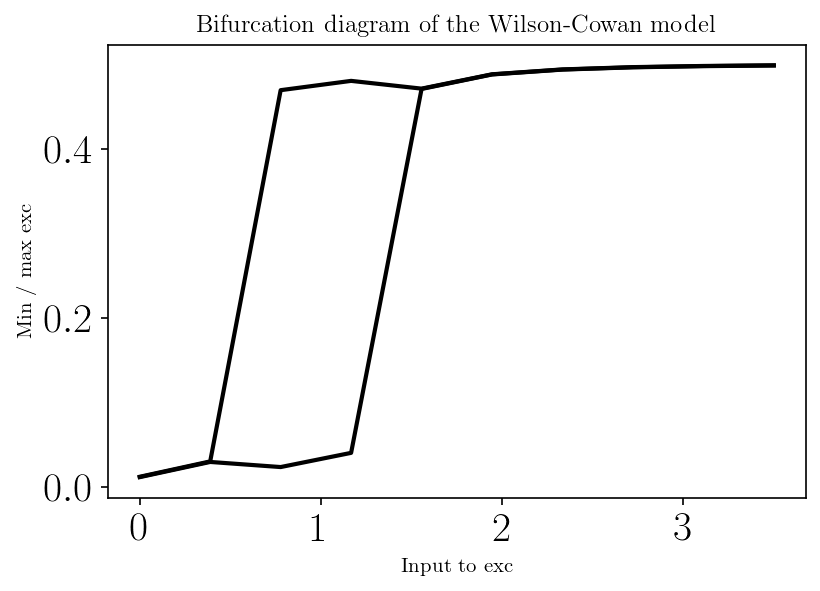

In [6]:
plt.plot(exc_inputs, max_exc, c='k', lw = 2)
plt.plot(exc_inputs, min_exc, c='k', lw = 2)
plt.title("Bifurcation diagram of the Wilson-Cowan model")
plt.xlabel("Input to exc")
plt.ylabel("Min / max exc")

## Single node simulation

In [7]:
import neurolib.utils.functions as func

wc = WCModel()
# control model parameters
wc.params['duration'] =  200
wc.params['exc_ext'] = 1.14
wc.params['c_excinh'] = 10.33
wc.params['c_inhexc'] = 9.67
wc.params['c_inhinh'] = 0
wc.params['K_gl'] = 0.6
wc.params['sigma_ou'] = 0
wc.run()

exc_tc = wc.outputs.exc[0,:]

frs, powers = func.getPowerSpectrum(
    exc_tc,
    wc.params["dt"],
)

wc_scz= WCModel()
# control model parameters
wc_scz.params['duration'] =  200
wc_scz.params['exc_ext'] = 1.25
wc_scz.params['c_excinh'] = 10.1
wc_scz.params['c_inhexc'] = 9.55
wc_scz.params['c_inhinh'] = 0
wc_scz.params['K_gl'] = 0.6
wc_scz.params['sigma_ou'] = 0
wc_scz.run()

exc_tc_scz = wc_scz.outputs.exc[0,:]

frs_scz, powers_scz = func.getPowerSpectrum(
    exc_tc_scz,
    wc_scz.params["dt"],
)

/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 10000 is greater than input length  = 2000, using nperseg = 2000
  .format(nperseg, input_length))


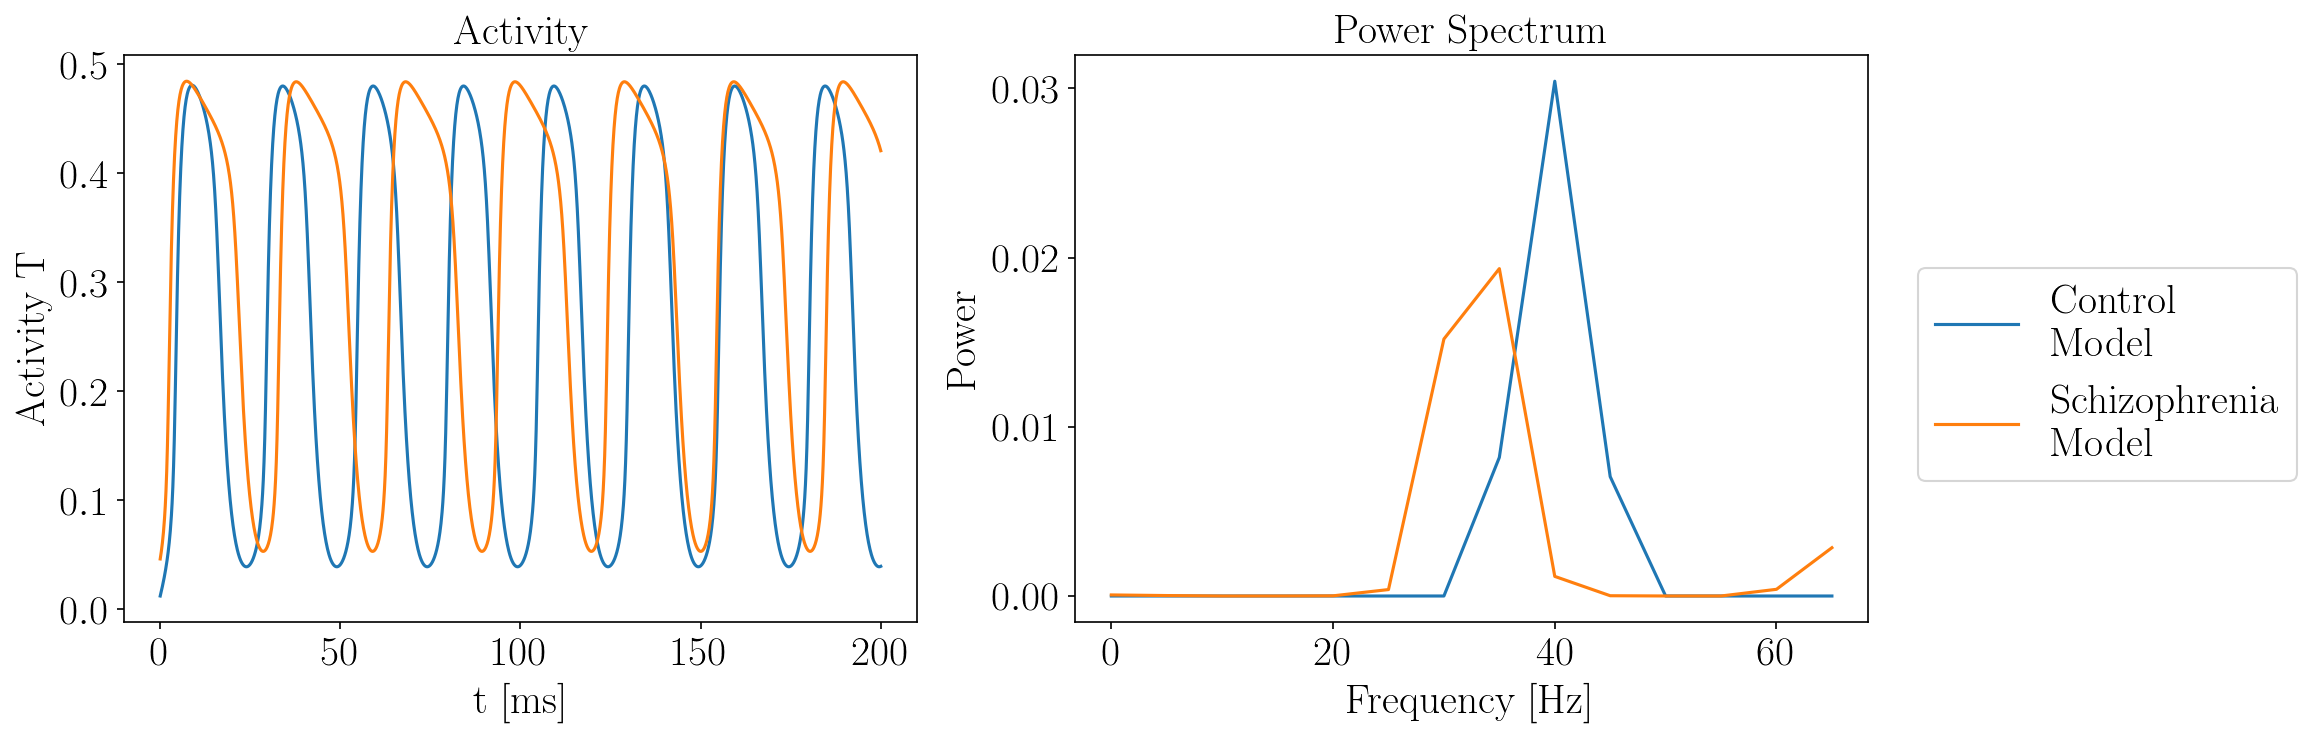

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(wc.t, wc.exc.T)
axs[0].plot(wc_scz.t, wc_scz.exc.T)
axs[0].set_title("Activity",fontsize=20)
axs[0].set_xlabel("t [ms]",fontsize=20)
axs[0].set_ylabel("Activity T", fontsize=20)
axs[1].plot(frs, powers, label="Control \n Model")
axs[1].plot(frs_scz, powers_scz, label="Schizophrenia \n Model")
axs[1].set_title("Power Spectrum", fontsize=20)
axs[1].set_xlabel("Frequency [Hz]", fontsize=20)
axs[1].set_ylabel("Power", fontsize=20)

#plt.plot(x, y1, "-b", label="sine")
#plt.plot(x, y2, "-r", label="cosine")

fig.legend(bbox_to_anchor=(1.1, 0.625), fontsize=20)

In [17]:
wc = WCModel()
# control model parameters
wc.params['duration'] =  200
wc.params['exc_ext'] = 1.14
wc.params['c_excinh'] = 10.33
wc.params['c_inhexc'] = 9.67
wc.params['c_inhinh'] = 0
wc.params['K_gl'] = 0.6
wc.params['sigma_ou'] = 0
wc.run()

exc_tc = wc.outputs.exc[0,:]

frs, powers = func.getPowerSpectrum(
    exc_tc,
    wc.params["dt"],
)

/Users/pamirozsuna/opt/anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 10000 is greater than input length  = 2000, using nperseg = 2000
  .format(nperseg, input_length))


Text(0, 0.5, 'Power')

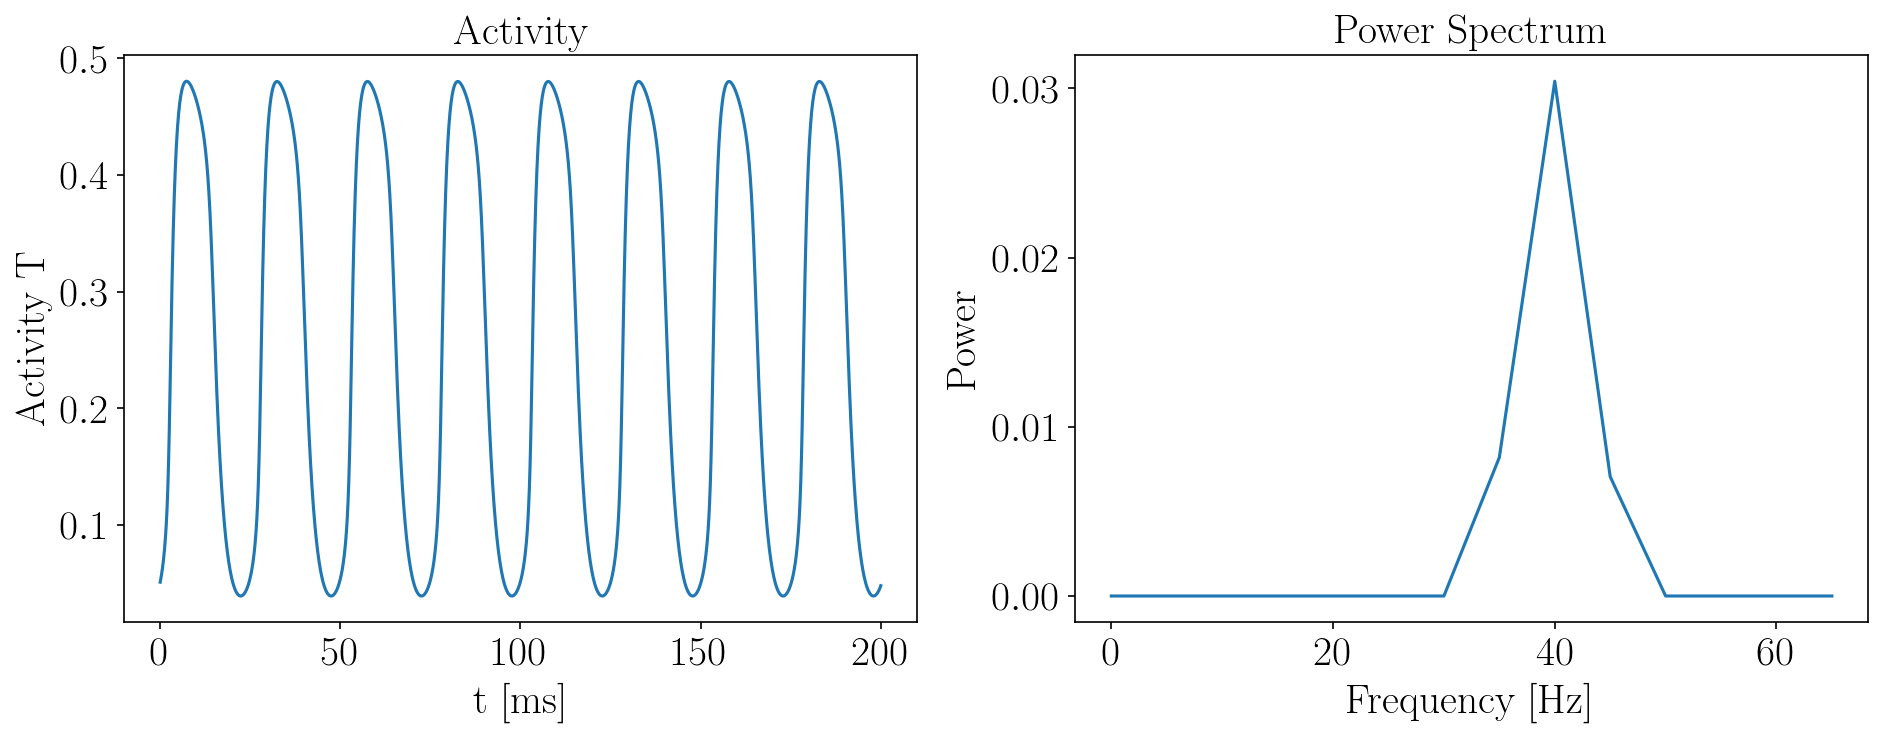

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].plot(wc.t, wc.exc.T)
axs[0].set_title("Activity", fontsize=20)
axs[0].set_xlabel("t [ms]", fontsize=20)
axs[0].set_ylabel("Activity T", fontsize=20)
axs[1].plot(frs, powers)
axs[1].set_title("Power Spectrum", fontsize=20)
axs[1].set_xlabel("Frequency [Hz]", fontsize=20)
axs[1].set_ylabel("Power", fontsize=20)

## Brain network

In [19]:
import os
import numpy as np
import logging 
import dill

from neurolib.models.wc import WCModel
from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.evolution import Evolution
import neurolib.utils.functions as func
import neurolib.utils.devutils as du
from neurolib.utils.loadData import filterSubcortical

import neurolib.optimize.evolution.deapUtils as deapUtils

from neurolib.utils.loadData import Dataset

from scipy.io import loadmat
import glob

import multiprocessing


import sys
import ast


# Write dataset loading function
def loadMat():
    Cmatrix = []
    Dmatrix = []
    Fmatrix = []
    Tmatrix = []
    FC_LR = []
    FC_RL = []
    TC_LR = []
    TC_RL = []

    dataDir = "/Users/pamirozsuna/Desktop/pamir_ma/"

    subjectsFC = sorted(glob.glob(dataDir + "FC/1_AAL/*")) # reading the file names using glob
    subjectsSC = sorted(glob.glob(dataDir + "SC/1_AAL/*"))
    for subjectSC in subjectsSC:
	    for subjectFC in subjectsFC:
	    	# take subjects only if they have all SC, LR_FC and RL_FC matrices
	    	if(subjectSC[-6:]==subjectFC[-6:] and os.path.isfile(subjectFC + '/rfMRI_REST1_LR/FC.mat')  and os.path.isfile(subjectFC + '/rfMRI_REST1_RL/FC.mat')):
	    		this_cm = loadmat(subjectSC + "/DTI_CM.mat")['SC']
	    		Cmatrix.append(this_cm)
	    		this_dc = loadmat(subjectSC + "/DTI_LEN.mat")['LEN']
	    		Dmatrix.append(this_dc)
	    		FC_LR = loadmat(subjectFC + '/rfMRI_REST1_LR/FC.mat')["fc"]
	    		TC_LR = loadmat(subjectFC + '/rfMRI_REST1_LR/TC.mat')["tc"]
	    		FC_RL = loadmat(subjectFC + '/rfMRI_REST1_RL/FC.mat')["fc"]
	    		TC_RL = loadmat(subjectFC + '/rfMRI_REST1_RL/TC.mat')["tc"]
	    		Fmatrix.append(filterSubcortical(np.mean( np.array([FC_LR, FC_RL]), axis=0)))
	    		Tmatrix.append(filterSubcortical(np.mean( np.array([TC_LR[:,0:355], TC_RL[:,0:355]]), axis=0), axis=0))
        
    return Cmatrix,Dmatrix,Tmatrix,Fmatrix

def averageMat(Mat):
    avMat = np.zeros((94,94))
    for i in range(len(Mat)):
        avMat = avMat + Mat[i]
    avMat = avMat/len(Mat)
    return avMat

def ComputeAverageMats(Cmatrix, Dmatrix):
    Cmat = averageMat(Cmatrix)
    Dmat = averageMat(Dmatrix)
    return Cmat, Dmat

ds = Dataset(datasetName = 'gw', normalizeCmats = None)
dataDict_sc, dataDict_len, dataDict_ts, dataDict_fc = loadMat()

GW_FC_mean = np.mean(ds.FCs, axis=0) # Average FC GW
ds.FCs = []
ds.FCs.append(GW_FC_mean)
ds.FCs.append(np.mean(dataDict_fc, axis=0)) # Add average FC HCP
print("ds FCs shape: " + str(np.shape(ds.FCs)))

print(np.shape(dataDict_ts))
GW_BOLD_mean = np.mean(ds.BOLDs, axis = 0)
print(np.shape(GW_BOLD_mean))
ds.BOLDs = []
ds.BOLDs.append(GW_BOLD_mean)
ds.BOLDs.append(np.mean(dataDict_ts, axis=0))
print("ds BOLDs length: " + str(len(ds.BOLDs)))

ds.Cmat, ds.Dmat = ComputeAverageMats(dataDict_sc, dataDict_len)
ds.Cmat = filterSubcortical(ds.Cmat)
ds.Cmats = dataDict_sc
ds.data = []
ds.Dmat = filterSubcortical(ds.Dmat)
ds.Dmats = dataDict_len

ds FCs shape: (2, 80, 80)
(143, 80, 355)
(80, 355)
ds BOLDs length: 2


In [20]:
from neurolib.utils.loadData import Dataset

#ds = Dataset("hcp", fcd = True)
#wc = WCModel(Cmat = ds.Cmat, Dmat = ds.Dmat)
wc = WCModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

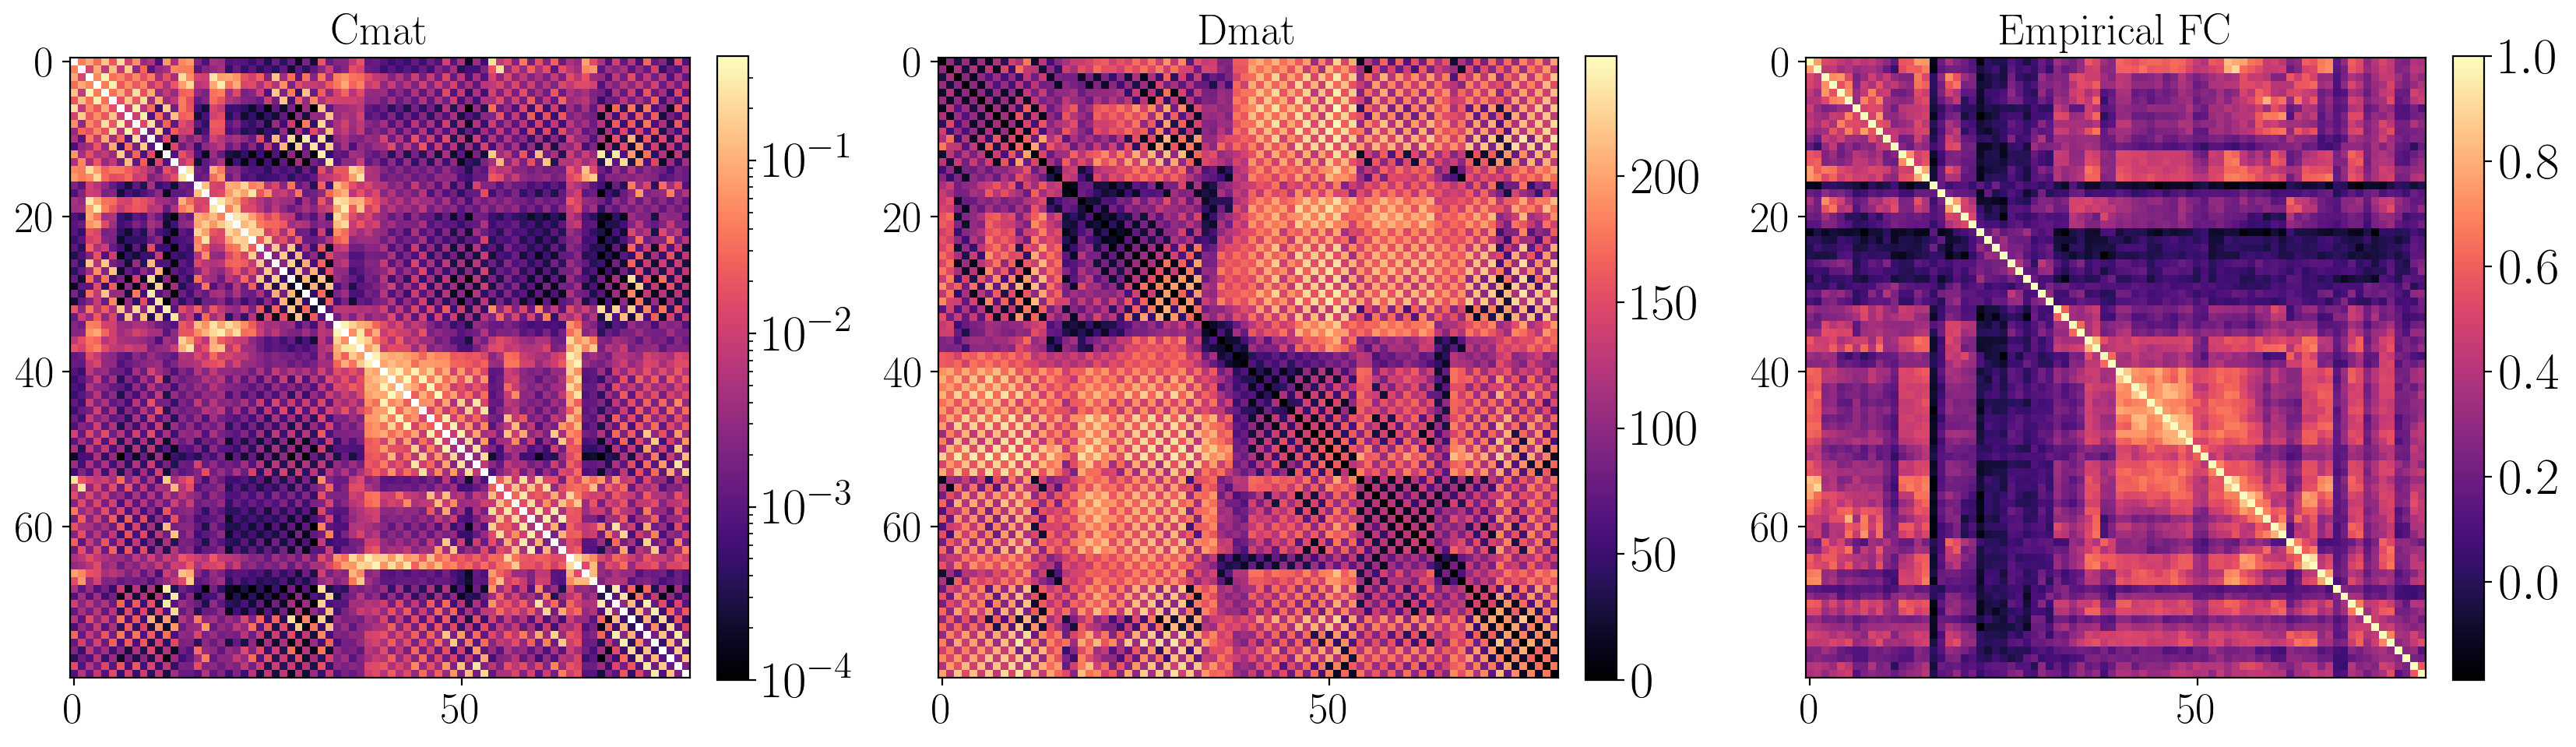

In [29]:
from matplotlib.colors import LogNorm
fig, axs = plt.subplots(1, 3, figsize=(20,12), dpi=200)
fig.subplots_adjust(wspace=0.28)


im = axs[0].imshow(wc.params['Cmat'], norm=LogNorm(vmin=10e-5, vmax=np.max(wc.params['Cmat'])))
axs[0].set_title("Cmat", fontsize=20)
fig.colorbar(im, ax=axs[0],fraction=0.046, pad=0.04)
im = axs[1].imshow(wc.params['lengthMat'], cmap='magma')
axs[1].set_title("Dmat",fontsize=20)
fig.colorbar(im, ax=axs[1],fraction=0.046, pad=0.04)
im = axs[2].imshow(ds.FCs[0], cmap='magma')
axs[2].set_title("Empirical FC",fontsize=20)
fig.colorbar(im, ax=axs[2],fraction=0.046, pad=0.04)


#im = axs[3].imshow(func.fcd(ds.BOLDs[0]))
#axs[3].set_title("Empirical FCD")
#fig.colorbar(im, ax=axs[3],fraction=0.046, pad=0.04)

In [24]:
wc.params['duration'] = 120*1000
wc.params['exc_ext'] = 0.45
wc.params['c_excinh'] = 10.333333333333334
wc.params['c_inhexc'] = 9.666666666666666
wc.params['c_inhinh'] = 0
wc.params['K_gl'] = 1.84
wc.params['sigma_ou'] = 4.28e-05

wc.run(chunkwise=True, bold = True)

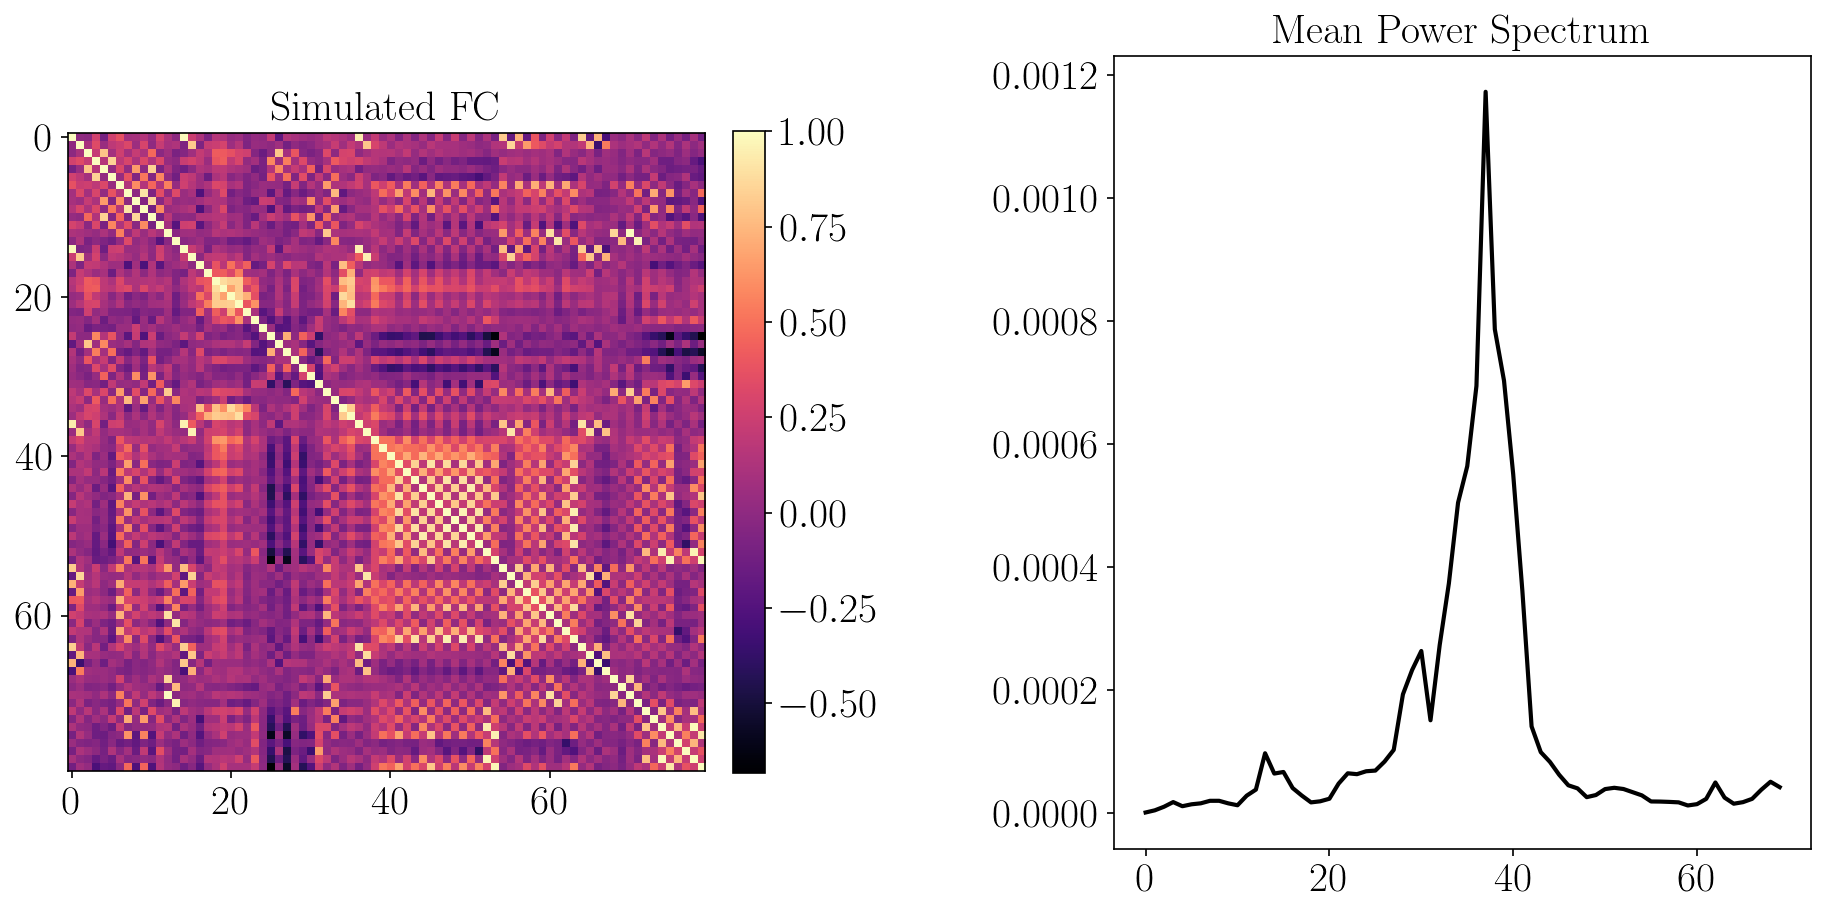

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].set_title("Simulated FC", fontsize=20)
im = axs[0].imshow(func.fc(wc.exc[:, -10000:]))
fig.colorbar(im, ax=axs[0],fraction=0.046, pad=0.04)
#axs[1].set_title("Simulated FCD")
#axs[1].imshow(func.fcd(wc.exc[:, -10000:], stepsize=100))
axs[1].set_title("Mean Power Spectrum",  fontsize=20)
fr, pw = func.getMeanPowerSpectrum(wc.exc, wc.params["dt"])
axs[1].plot(fr, pw, c='k', lw = 2)
fig.subplots_adjust(wspace=0.5)


In [ ]:
scores = [func.matrix_correlation(func.fc(wc.exc[:, -int(5000/wc.params['dt']):]), fcemp) for fcemp in ds.FCs]
print("Correlation per subject:", [f"{s:.2}" for s in scores])
print("Mean FC/FC correlation: {:.2f}".format(np.mean(scores)))